#Libraries used and Versions

pandas==2.0.3

matplotlib==3.7.2

numpy==1.24.3

seaborn==0.12.2

In [1]:
#Import Libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Read the excel file
df = pd.read_excel('Copy of telecom_churn.xlsx')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# Filter the data into two groups: those with and without voice mail plan
df_with_vm = df[df['voice mail plan'] == 'yes']
df_without_vm = df[df['voice mail plan'] == 'no']

In [7]:
# Select relevant features for comparison
features_to_compare = [
    'total day minutes', 'total eve minutes', 'total night minutes', 
    'total intl minutes', 'customer service calls'
]

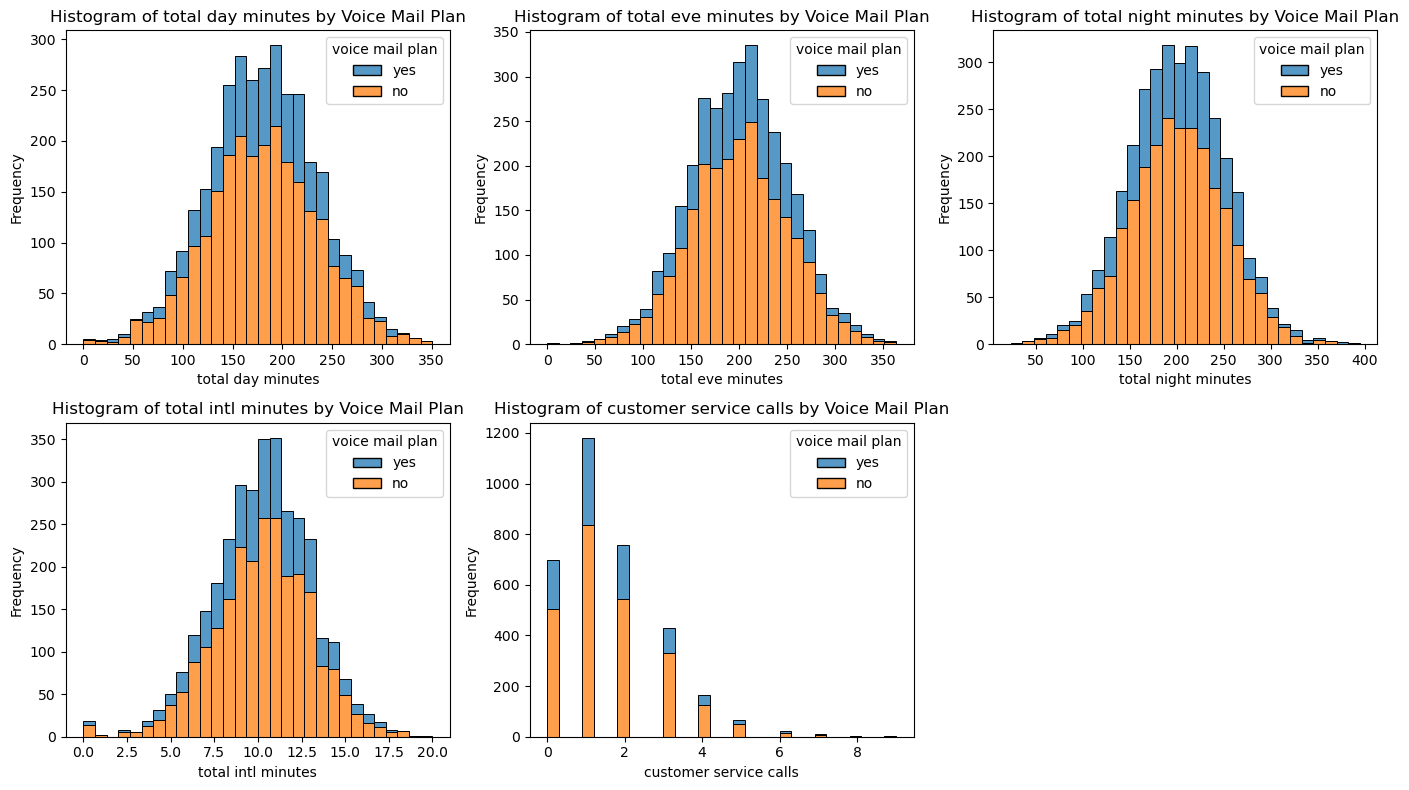

In [8]:
# Plot the comparison
# Set up the plot
plt.figure(figsize=(14, 8))

# Plot histograms for each feature in features_to_compare
for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='voice mail plan', multiple='stack', bins=30)
    plt.title(f'Histogram of {feature} by Voice Mail Plan')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Convert 'international plan' and 'churn' to numerical values for analysis
df['international plan'] = df['international plan'].apply(lambda x: 1 if x == 'yes' else 0)
df['churn'] = df['churn'].apply(lambda x: 1 if x else 0)

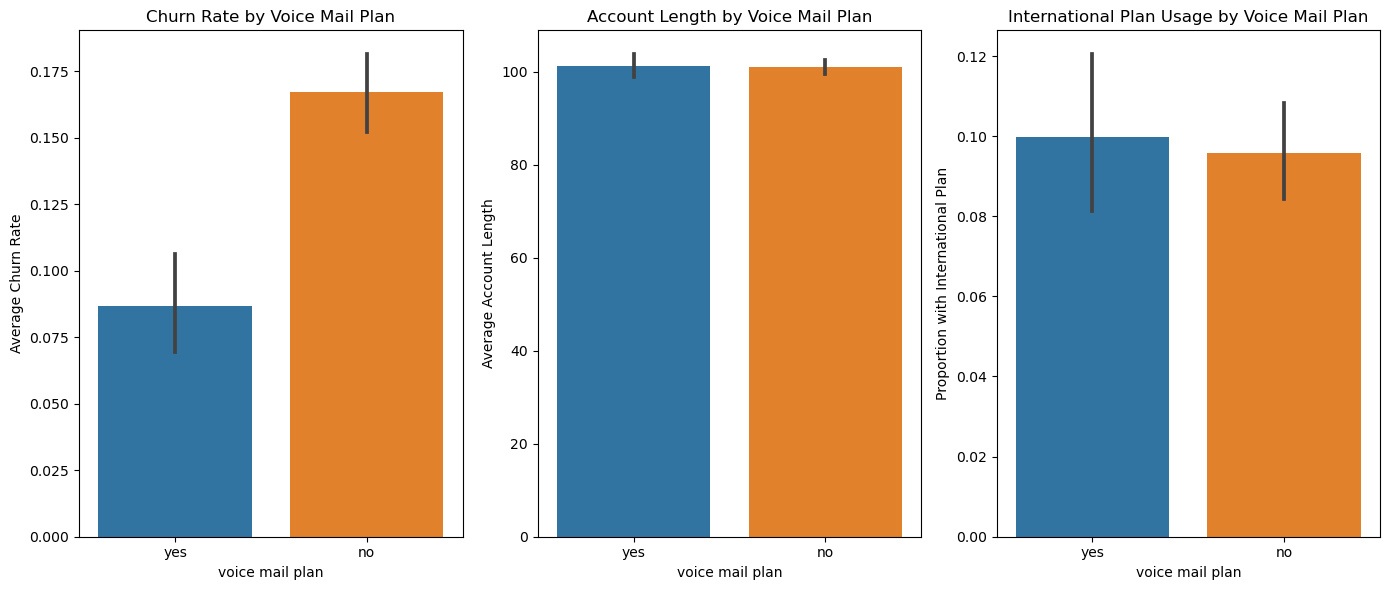

In [10]:
plt.figure(figsize=(14, 6))

# Subplot 1: Churn rate by voice mail plan
plt.subplot(1, 3, 1)
sns.barplot(x='voice mail plan', y='churn', data=df)
plt.title('Churn Rate by Voice Mail Plan')
plt.ylabel('Average Churn Rate')

# Subplot 2: Account length by voice mail plan
plt.subplot(1, 3, 2)
sns.barplot(x='voice mail plan', y='account length', data=df)
plt.title('Account Length by Voice Mail Plan')
plt.ylabel('Average Account Length')

# Subplot 3: International plan by voice mail plan
plt.subplot(1, 3, 3)
sns.barplot(x='voice mail plan', y='international plan', data=df)
plt.title('International Plan Usage by Voice Mail Plan')
plt.ylabel('Proportion with International Plan')

plt.tight_layout()
plt.show()


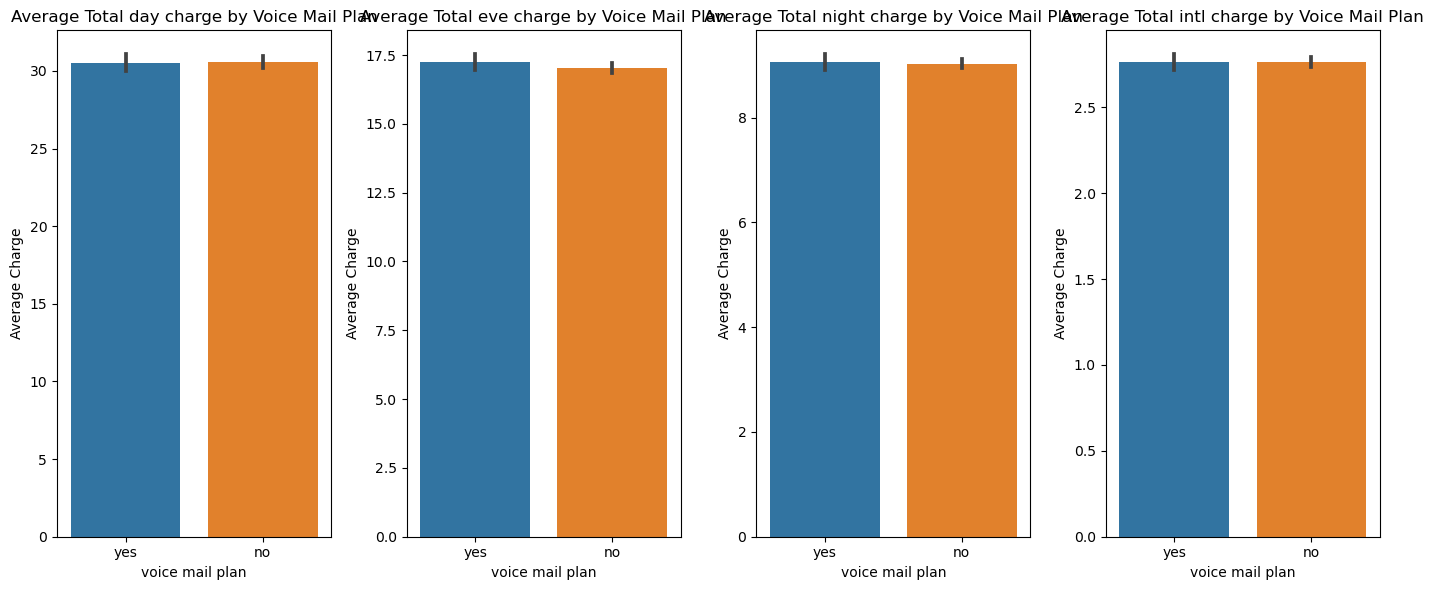

In [11]:
# Features to visualize
charge_features = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']

# Set up the plot for charges
plt.figure(figsize=(14, 6))
for i, feature in enumerate(charge_features, 1):
    plt.subplot(1, 4, i)
    sns.barplot(x='voice mail plan', y=feature, data=df)
    plt.title(f'Average {feature.capitalize()} by Voice Mail Plan')
    plt.ylabel('Average Charge')

plt.tight_layout()
plt.show()

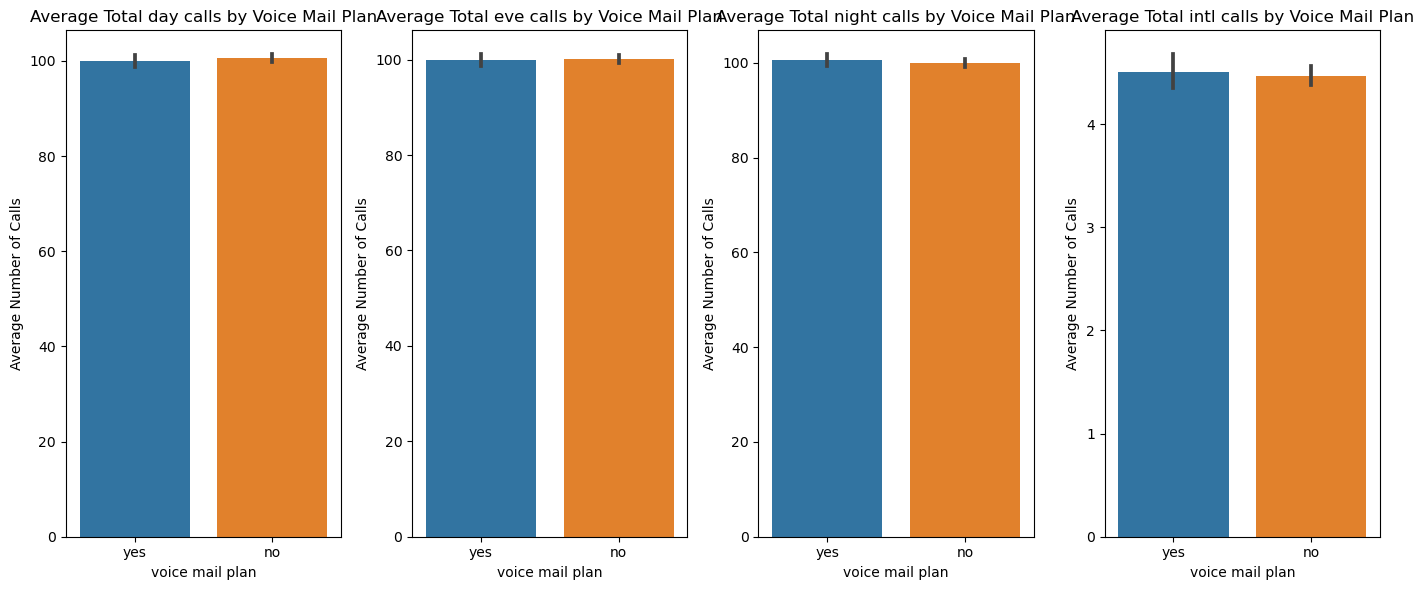

In [12]:
# Features to visualize
call_features = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls']

# Set up the plot for number of calls
plt.figure(figsize=(14, 6))
for i, feature in enumerate(call_features, 1):
    plt.subplot(1, 4, i)
    sns.barplot(x='voice mail plan', y=feature, data=df)
    plt.title(f'Average {feature.capitalize()} by Voice Mail Plan')
    plt.ylabel('Average Number of Calls')

plt.tight_layout()
plt.show()

In [13]:
# Selecting relevant usage behavior features for similarity analysis
features = [
    'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge',
    'customer service calls'
]

In [14]:
# Standardizing the features 
scaler = StandardScaler()

In [15]:
# Standardizing both datasets
scaled_with_vm = scaler.fit_transform(df_with_vm[features])
scaled_without_vm = scaler.transform(df_without_vm[features])

In [16]:
scaled_with_vm

array([[ 1.60352588,  0.5034581 ,  1.60378838, ..., -0.59690637,
        -0.08341094, -0.39775633],
       [-0.33819279,  1.1629607 , -0.33846818, ..., -0.59690637,
         1.24002536, -0.39775633],
       [ 0.72365529, -0.61262322,  0.7231516 , ...,  0.98455247,
        -0.97011325,  1.11766242],
       ...,
       [-0.29129137,  0.55418907, -0.29101532, ...,  1.77528189,
         0.73711957, -1.15546571],
       [-0.43949985, -1.17066388, -0.43999522, ...,  0.58918776,
        -0.12311403,  0.35995305],
       [ 1.02757648,  0.65565101,  1.02773274, ..., -0.20154166,
         1.24002536, -1.15546571]])

The similarity matrix is a 2D NumPy array (matrix) where each element represents the similarity between two entities (Users with and users without VM).
np.maxis a NumPy function that calculates the maximum value along a specified axis and in our case, its axis=1 (Row)

In [17]:
# Compute the cosine similarity between customers with and without voice mail plans
similarity_matrix = cosine_similarity(scaled_without_vm, scaled_with_vm)

In [18]:
similarity_matrix.shape

(2411, 922)

max_similarities is a 1D array containing the maximum similarity for each row of the similarity_matrix.

"most_similar_indices = np.argmax(similarity_matrix, axis=1)" identifies the index of the maximum similarity value for each row in the 2D similarity_matrix array.

In [19]:
# For each customer without a voice mail plan, find the maximum similarity score
# and the corresponding customer with a voice mail plan
max_similarities = np.max(similarity_matrix, axis=1)
most_similar_indices = np.argmax(similarity_matrix, axis=1)

In [20]:
max_similarities

array([0.88379246, 0.85280301, 0.83652551, ..., 0.84985734, 0.86219496,
       0.88285163])

In [21]:
most_similar_indices

array([318, 188, 590, ..., 271, 902, 400], dtype=int64)

In [22]:
# Adding the max similarity score to the data_without_vm DataFrame for reference
df_without_vm['max_similarity'] = max_similarities

C:\Users\Hp Envy 17-AE165NR\AppData\Local\Temp\ipykernel_18280\3509636946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_vm['max_similarity'] = max_similarities


In [23]:
df_without_vm

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,max_similarity
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0.883792
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.852803
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0.836526
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,0.780563
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,0.865413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,24.21,178.9,92,8.05,14.9,7,4.02,1,False,0.931704
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,16.12,221.4,128,9.96,11.8,5,3.19,2,False,0.847019
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0.849857
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0.862195


Viewing HeatMap for Top 20 Customers Without vs. With Voice Mail Plan

In [24]:
subset_size = 20
heatmap_data = similarity_matrix[:subset_size, :subset_size]

Text(0, 0.5, 'Customers Without Voice Mail Plan')

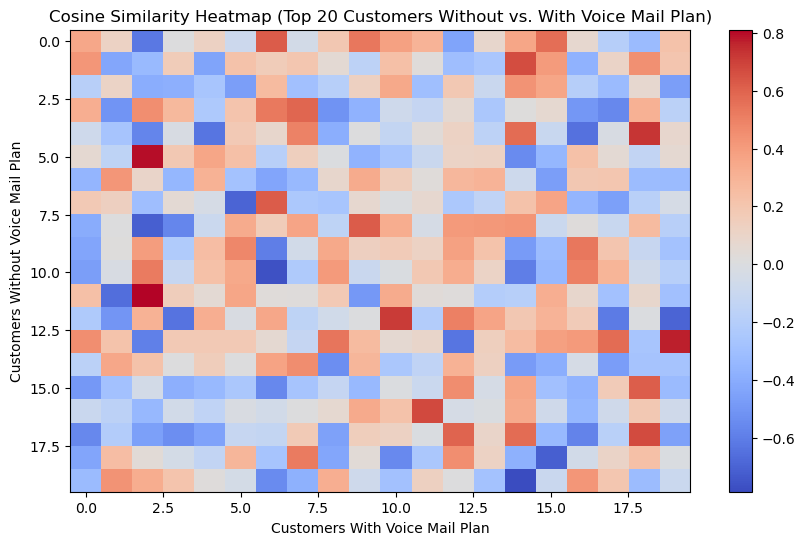

In [25]:
# Save the heatmap as an image file for download
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Cosine Similarity Heatmap (Top 20 Customers Without vs. With Voice Mail Plan)')
plt.xlabel('Customers With Voice Mail Plan')
plt.ylabel('Customers Without Voice Mail Plan')


Setting out Similarity threshold to 0.95, meaning to filter out customers with similarity score = 0.95 or above

In [26]:
# Set a similarity threshold (e.g., 0.95)
similarity_threshold = 0.95

In [27]:
# Filter the customers without a voice mail plan whose similarity score exceeds the threshold
recommended_customers = df_without_vm[df_without_vm['max_similarity'] >= similarity_threshold]

In [28]:
# Display the recommended customers along with their similarity scores
recommended_customers_list = recommended_customers[['phone number', 'voice mail plan', 'max_similarity']].sort_values(by='max_similarity', ascending=False)

recommended_customers_list is the list of users without a voicemail plan that are recommended for a voicemail plan

In [29]:
recommended_customers_list

,phone number,voice mail plan,max_similarity
1370,359-1441,no,0.987007
584,420-9838,no,0.982403
303,360-6868,no,0.980742
775,392-6420,no,0.976872
1982,404-9754,no,0.975901
834,381-5047,no,0.974861
2352,404-2877,no,0.974561
677,375-3003,no,0.973000
416,361-6563,no,0.972629
3323,362-5899,no,0.971844


In [ ]:
pip install print-versions

In [ ]:
from print_versions import print_versions

import numpy as np
from pandas import DataFrame

print_versions(globals())

In [30]:
from joblib import dump

In [31]:
np.save('recommended_customers.npy', recommended_customers)